# **Week 1 Question 3**

Treat the planetary motion problem as a differential equation problem with given initial conditions (Take earth and Sun). Initial conditions being the orbital radius and orbital velocity of earth (assume a circular orbit).

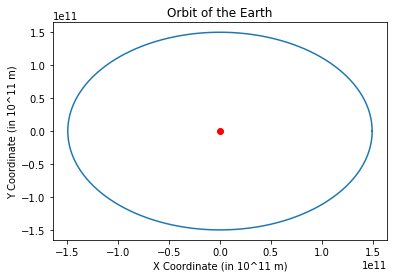

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#time interval
n_years = 1
dur = 24*3600*365.25*n_years
dt = 60

#Constants
G = 6.6743*10**-11
M_Sun = 1.98847*10**30
GM_Sun = G*M_Sun
R_Earth = 149597870700

#initial coordinates (the Sun is at the origin)
y0 = 0
x0 = R_Earth

#initial velocity
vy0 = 29780
vx0 = 0

#Function for conducting the Eulerian Simulation
def Euler_Iterate(vector, i):
    x = vector[i, 0]
    y = vector[i, 1]
    
    vx = vector[i, 2]
    vy = vector[i, 3]
    
    vector[i + 1, 0] = x + vx*dt
    vector[i + 1, 1] = y + vy*dt
    
    vector[i + 1, 2] = vx - dt*np.cos(np.arctan2(y,x))*GM_Sun/(x*x + y*y)
    vector[i + 1, 3] = vy - dt*np.sin(np.arctan2(y,x))*GM_Sun/(x*x + y*y)

#Function for conducting the RK4 Simulation
def RK4_Iterate(vector, i):
    x = vector[i, 0]
    y = vector[i, 1]
    
    vx = vector[i, 2]
    vy = vector[i, 3]
    
    
    xK2 = x + vx*dt/2
    yK2 = y + vy*dt/2
    
    vxK2 = vx - dt/2*np.cos(np.arctan2(yK2,xK2))*GM_Sun/(xK2*xK2 + yK2*yK2)
    vyK2 = vy - dt/2*np.sin(np.arctan2(yK2,xK2))*GM_Sun/(xK2*xK2 + yK2*yK2)
    
    
    xK3 = x + vxK2*dt/2
    yK3 = y + vyK2*dt/2
    
    vxK3 = vx - dt/2*np.cos(np.arctan2(yK3,xK3))*GM_Sun/(xK3*xK3 + yK3*yK3)
    vyK3 = vy - dt/2*np.sin(np.arctan2(yK3,xK3))*GM_Sun/(xK3*xK3 + yK3*yK3)
    
    
    xK4 = x + vxK3*dt
    yK4 = y + vyK3*dt
    
    vxK4 = vx - dt*np.cos(np.arctan2(yK4,xK4))*GM_Sun/(xK4*xK4 + yK4*yK4)
    vyK4 = vy - dt*np.sin(np.arctan2(yK4,xK4))*GM_Sun/(xK4*xK4 + yK4*yK4)
    
    
    vector[i + 1, 0] = x + dt*(vx + 2*vxK2 + 2*vxK3 + vxK4)/6
    vector[i + 1, 1] = y + dt*(vy + 2*vyK2 + 2*vyK3 + vyK4)/6
    
    vector[i + 1, 2] = vx - dt*np.cos(np.arctan2(y,x))*GM_Sun/(x*x + y*y)
    vector[i + 1, 3] = vy - dt*np.sin(np.arctan2(y,x))*GM_Sun/(x*x + y*y)
    

t_array = np.arange(0,dur,dt)
n = t_array.size

vector = np.ones((n, 4))
vector[0, :] = [x0, y0, vx0, vy0]

for i in range(t_array.size - 1):
    RK4_Iterate(vector, i)

plt.title("Orbit of the Earth")
plt.xlabel("X Coordinate (in 10^11 m)")
plt.ylabel("Y Coordinate (in 10^11 m)")    

#the Sun
plt.plot(0, 0, "ro")

plt.plot(vector[:, 0], vector[:, 1])